<a href="https://colab.research.google.com/github/Faisal-Nabi/A2_13176096/blob/master/Assignment_2_13176096.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2




## Name:      Faisal Nabi
## Reg: 13176096
## Github Link: https://github.com/Faisal-Nabi/A2_13176096/blob/master/Assignment_2_13176096.ipynb

##NOTE: The accuracy for each model depends on the operating machine. The accuracy noted in this report is based on the most accurate values. It changes on execution.

##Introduction

The heart disease is the common cause of death among people living across the global. According to the **Heart Disease and Stroke Statistics 2019**, every 4 out of 10 death is of death disease in United States. Different factors such as cholesterol, high blood pressure and sugar can all lead up to heart diseases which can cause death. The sole purpose of predicting the cause of the heart disease is to get better understanding of the factors which contributes into the different diseases. There are 3 types of heart diseases; Coronary Artery Disease (acronym CAD), Congestive Heart Failure (CHF), Bad Heart Rhythms. All these have different risk factors.

The goal is to find weather the patient have heart disease. The algorithms will help in analysing the risk factors behind the diseases which will give doctors or patients the better idea of which risk factor to look into for removing the disease. Also, knowing the factors beforehand will save patient life and that’s the main purpose of building the best model.The algorithm will answer the question "Does the patient have the heart diease?" The answer will be in 0 and 1 which is 0 for no disease and 1 for disease.

In this report, different algorithm are used to find the best model for “Cause of disease in human being” dataset. The dataset is taken kaggal from cleveland database.Firstly EDA is performed to look into the relationship among different heart disease with different risk factors leading up to it. After EDA, the machine learning models were build and the accuracy was detected based on the inputs. The comparsion is done with different machine learning algorithm.The model which will give best accuracy will be choosen. Later on, the classification report was build to check the f-1 score for the model.


##Input

There are 13 inputs: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal


##Output

The output is the target value which is 0 and 1. The 0 means that a patient don’t have a heart disease and 1 means that patient have a heart disease. 

## Exploration


The dataset is clean and tidy but the column name are not easy to understand so the first challenge is to understand the column and name them accordingly. Later, the second challenge is to find the correlation between different columns. The thrid challenge is to use the important feature to pridcit the target value and lastly to find the best machine algorithm to answer the problem. All of these challenges will be solve in this step.

The first step in data analysis is data exploration. I will install the library first to make sure that the data is imported and later the visulaization and algorithm will be used.

In [0]:
import pandas as pan
import numpy as num
import seaborn as sns
import matplotlib.pyplot as plot
from matplotlib import rcParams


import warnings as warn
warn.filterwarnings('ignore')

In [0]:

import io
import requests
url="https://raw.githubusercontent.com/Faisal-Nabi/A2_13176096/master/heart.csv"
s=requests.get(url).content
read=pan.read_csv(io.StringIO(s.decode('utf-8')))

In [98]:
read.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The data shows different columns. The name of the columns doesn't make any sense. Let rename the columns to make it more readable.



In [0]:
read.columns = ['age', 'gender', 'type_of_chest_pain', 'blood_pressure', 'cholesterol', 'level_of_sugar_in_blood', 'electrocardiogram', 'maximum_rate_of_heart_achieved',
       'exercise_induced_heart_attack', 'standerd_depression', 'standerd_slope', 'num_of_cardiac_vessels', 'thalassemia', 'target']


In [100]:
read.head()

,age,gender,type_of_chest_pain,blood_pressure,cholesterol,level_of_sugar_in_blood,electrocardiogram,maximum_rate_of_heart_achieved,exercise_induced_heart_attack,standerd_depression,standerd_slope,num_of_cardiac_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
## Lets check the total number of columns
read.shape

(303, 14)

In [102]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                               303 non-null int64
gender                            303 non-null int64
type_of_chest_pain                303 non-null int64
blood_pressure                    303 non-null int64
cholesterol                       303 non-null int64
level_of_sugar_in_blood           303 non-null int64
electrocardiogram                 303 non-null int64
maximum_rate_of_heart_achieved    303 non-null int64
exercise_induced_heart_attack     303 non-null int64
standerd_depression               303 non-null float64
standerd_slope                    303 non-null int64
num_of_cardiac_vessels            303 non-null int64
thalassemia                       303 non-null int64
target                            303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [103]:
read.describe()

,age,gender,type_of_chest_pain,blood_pressure,cholesterol,level_of_sugar_in_blood,electrocardiogram,maximum_rate_of_heart_achieved,exercise_induced_heart_attack,standerd_depression,standerd_slope,num_of_cardiac_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


With the describe method it is seen that all the columns are numeric in nature.

In [104]:
read.isnull().sum()

age                               0
gender                            0
type_of_chest_pain                0
blood_pressure                    0
cholesterol                       0
level_of_sugar_in_blood           0
electrocardiogram                 0
maximum_rate_of_heart_achieved    0
exercise_induced_heart_attack     0
standerd_depression               0
standerd_slope                    0
num_of_cardiac_vessels            0
thalassemia                       0
target                            0
dtype: int64

No null value is found in the data set which means there is no null value.

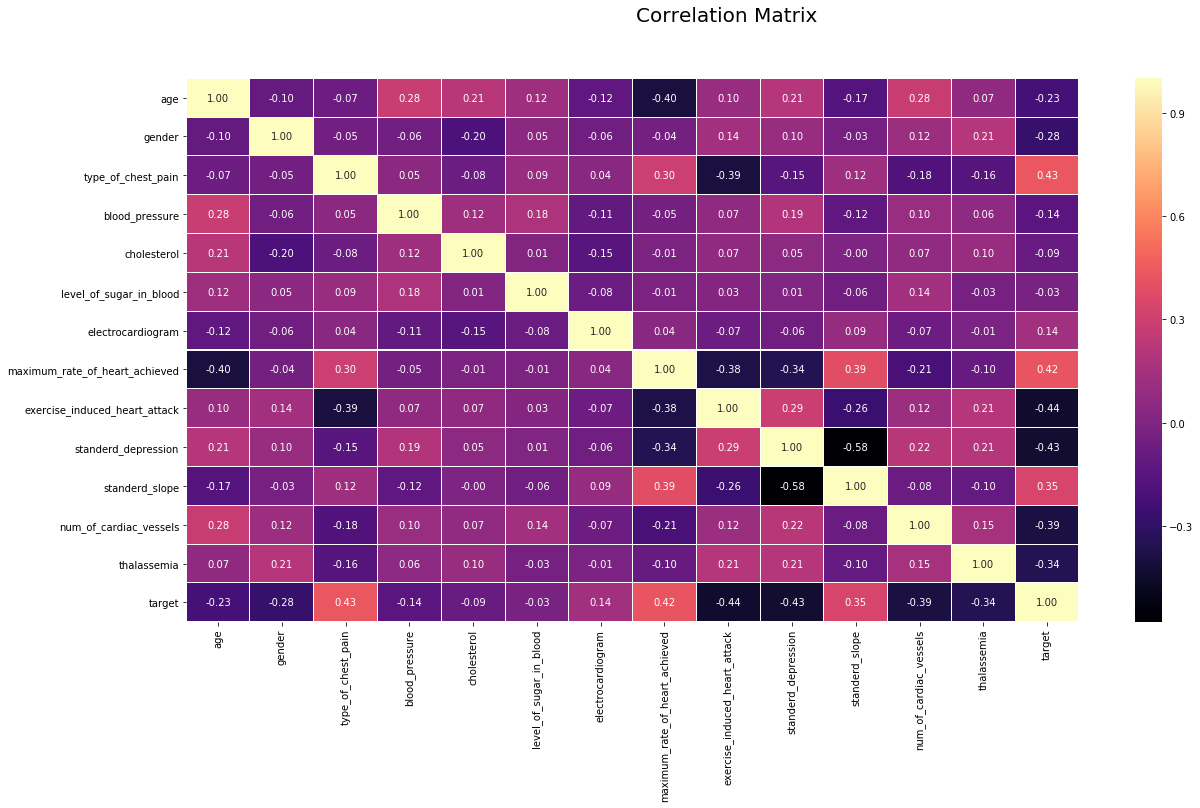

In [106]:

fig,ax = plot.subplots(figsize=(20, 10))
fig.suptitle("Correlation Matrix", fontsize=20)
sns.heatmap(read.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plot.show()

The correlation matrix shows the relationship between different features. The negative and positive correlation against the target is shown in this figure.

With the help of correlation matrix, we can use visulation on the important columns to check the insights.

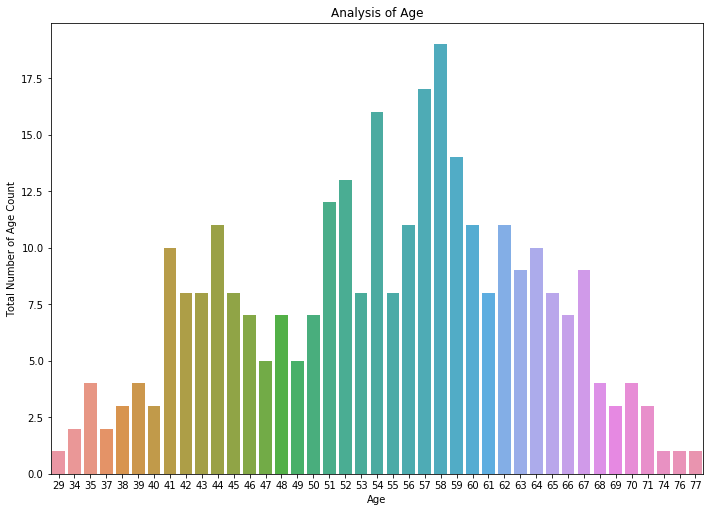

In [107]:
rcParams['figure.figsize'] = 11.7,8.30
sns.barplot(x=read.age.value_counts().index,y=read.age.value_counts().values)
plot.xlabel('Age')
plot.ylabel('Total Number of Age Count')
plot.title('Analysis of Age')
plot.show()

It would be much better if we divide the age from into three catgories: Young Adult, Adult, Senior

In [108]:
## Lets look into the min and max age group

read.describe()

,age,gender,type_of_chest_pain,blood_pressure,cholesterol,level_of_sugar_in_blood,electrocardiogram,maximum_rate_of_heart_achieved,exercise_induced_heart_attack,standerd_depression,standerd_slope,num_of_cardiac_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The min age is 29 and max is 77

In [109]:
minor_adult=read[(read.age>=29)&(read.age<35)]
major_adult=read[(read.age>=35)&(read.age<55)]
senior=read[(read.age>55)]
print('Minor Adult :',len(minor_adult))
print('Major Adult :',len(major_adult))
print('Senior :',len(senior))

Minor Adult : 3
Major Adult : 141
Senior : 151


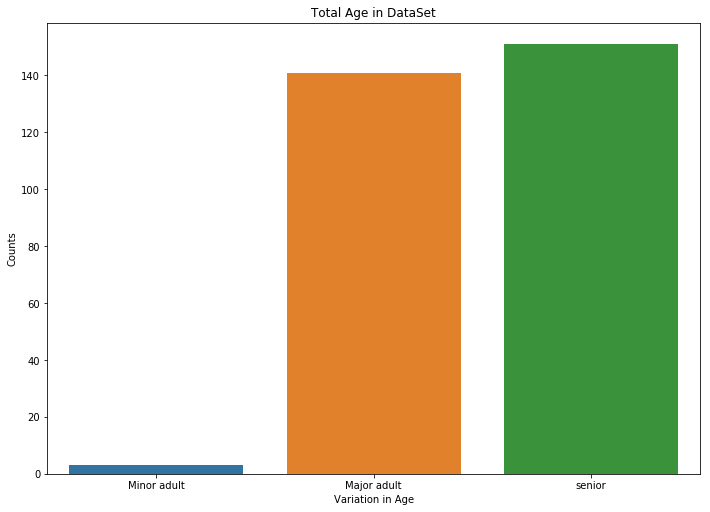

In [111]:
sns.barplot(x=['Minor adult','Major adult','senior'],y=[len(minor_adult),len(major_adult),len(senior)])
plot.xlabel('Variation in Age')
plot.ylabel('Counts')
plot.title('Total Age in DataSet')
plot.show()

Lets look into the heart disease occured in different ages with respect to target.

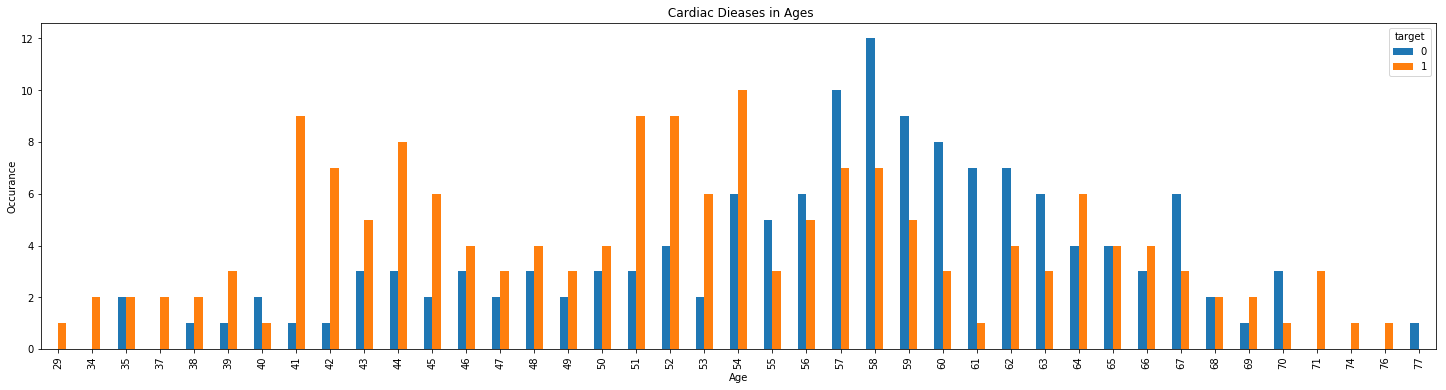

In [112]:
pan.crosstab(read.age,read.target).plot(kind="bar",figsize=(25,6))
plot.title(' Cardiac Dieases in Ages')
plot.xlabel('Age')
plot.ylabel('Occurance')
plot.show()

The Scatter plot shows that the age range from 42 to 55 have heart diseases. the senior people were found less disease which is gernerally the case becasue the people with heart disease dont often live long.

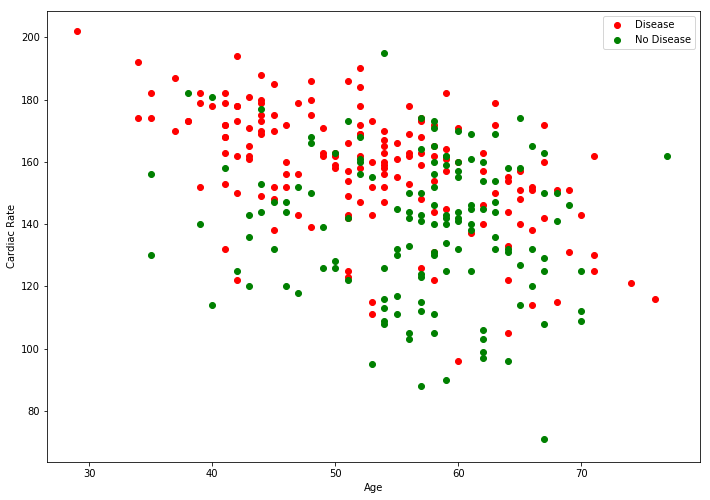

In [113]:
plot.scatter(x=read.age[read.target==1], y=read.maximum_rate_of_heart_achieved[(read.target==1)], c="red")
plot.scatter(x=read.age[read.target==0], y=read.maximum_rate_of_heart_achieved[(read.target==0)], c='green')
plot.legend(["Disease", "No Disease"])
plot.xlabel("Age")
plot.ylabel("Cardiac Rate")
plot.show()

Lets look into the gender with heart disease. It is seen that the female have more heart disease compare to male. It also seems that the data contain more male compare to female.

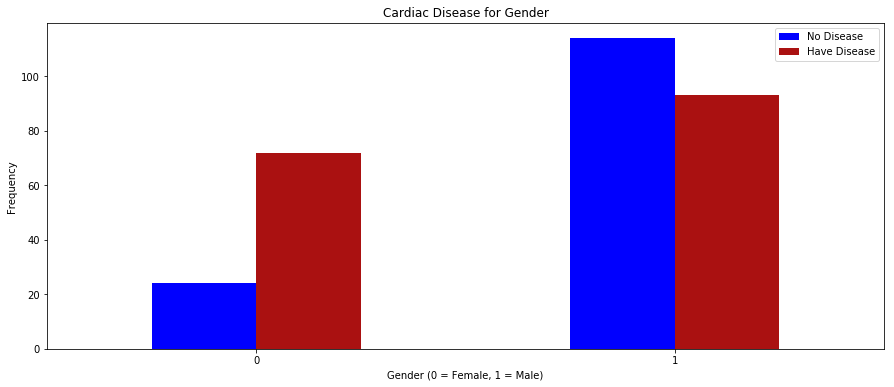

In [114]:
pan.crosstab(read.gender,read.target).plot(kind="bar",figsize=(15,6),color=['#0000FF','#AA1111' ])
plot.title('Cardiac Disease for Gender')
plot.xlabel('Gender (0 = Female, 1 = Male)')
plot.xticks(rotation=0)
plot.legend(["No Disease", "Have Disease"])
plot.ylabel('Frequency')
plot.show()

lets look into the Chest pain type because majority of the heart diseases involve severe chest pain.


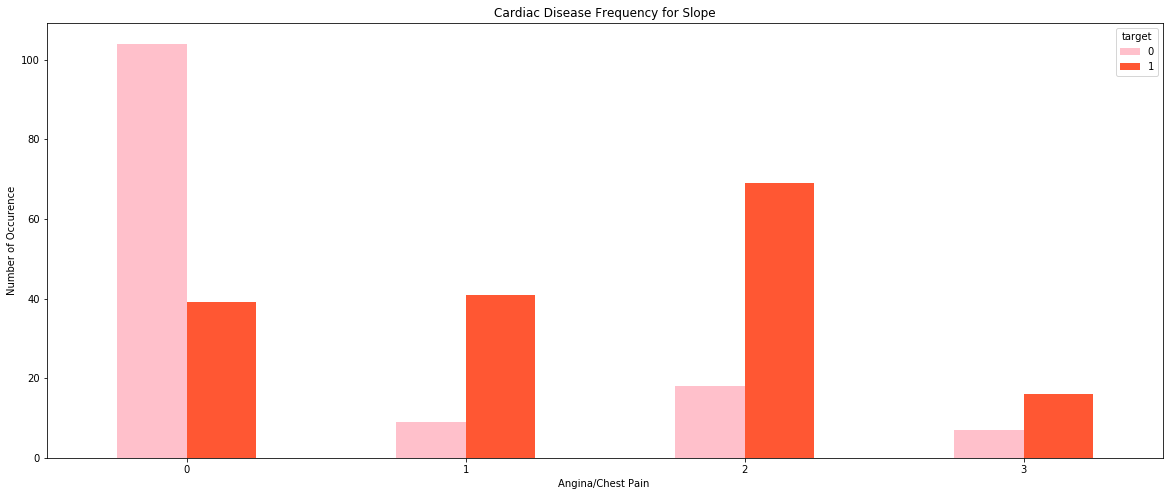

In [117]:
pan.crosstab(read.type_of_chest_pain,read.target).plot(kind="bar",figsize=(20,8),color=['#FFC0CB','#FF5733' ])
plot.title('Cardiac Disease Frequency for Slope')
plot.xlabel('Angina/Chest Pain ')
plot.xticks(rotation = 0)
plot.ylabel('Number of Occurence')
plot.show()

The Chest pain type 1 and 2 is more in the patient.Lets look further look into the bloooad pressure and cholesterol level becauase the high cholesterol means high blood pressure which will lead to different types of chestpains.

It is clearly seen that the chest type 2 and 1 have more cholestrola and high blood pressure. It can be said that these two factor plays a great role in having a heart disease in humans.

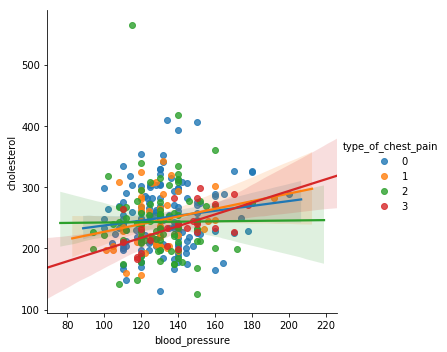

In [119]:
sns.lmplot(x="blood_pressure", y="cholesterol",data=df,hue="type_of_chest_pain")
plot.show()

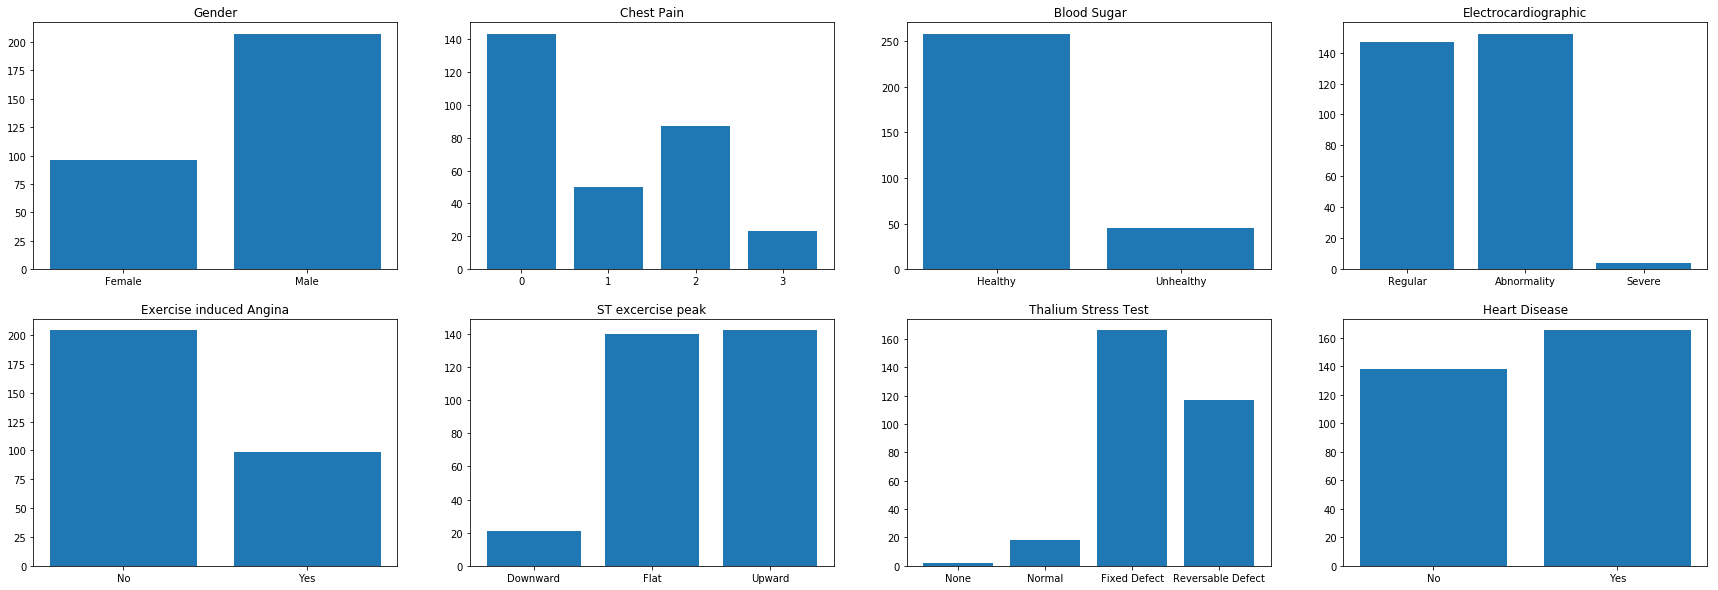

In [121]:
diagram, ax = plot.subplots(nrows=2, ncols=4, figsize=(30, 10))
fig.suptitle("Categorical Variable Distributions", fontsize=16)

x = ['Female','Male']
y = read.gender.value_counts(sort = False).values
ax[0][0].bar(x,y)
ax[0][0].set_title('Gender')

x = ['0','1','2','3']
y = read.type_of_chest_pain.value_counts(sort = False).values
ax[0][1].bar(x,y)
ax[0][1].set_title('Chest Pain')

x = ['Healthy','Unhealthy']
y = read.level_of_sugar_in_blood.value_counts(sort = False).values
ax[0][2].bar(x,y)
ax[0][2].set_title(' Blood Sugar')

x = ['Regular','Abnormality','Severe']
y = read.electrocardiogram.value_counts(sort = False).values
ax[0][3].bar(x,y)
ax[0][3].set_title('Electrocardiographic')


x = ['No','Yes']
y = read.exercise_induced_heart_attack.value_counts(sort = False).values
ax[1][0].bar(x,y)
ax[1][0].set_title('Exercise induced Angina')

x = ['Downward','Flat','Upward']
y = read.standerd_slope.value_counts(sort = False).values
ax[1][1].bar(x,y)
ax[1][1].set_title('ST excercise peak')

x = ['None','Normal','Fixed Defect','Reversable Defect']
y = read.thalassemia.value_counts(sort = False).values
ax[1][2].bar(x,y)
ax[1][2].set_title('Thalium Stress Test')

x = ['No','Yes']
y = read.target.value_counts(sort = False).values
ax[1][3].bar(x,y)
ax[1][3].set_title('Heart Disease')

plot.show()


##Methodology

This section contain the information for different algorithms used for pridectiting the cause of heart diseases. Intially, logisitc regression is used to for pridiction. To implement this algorithm, we need to find the depednedt and independent vairable and then speartae them accordingly. Different parameter is set to find the best accuracy for this model.
The normilization and z-score method will be used for scaling. We will use these methods for Support vector machine. The KNN algorithm will also be used later on.

In [122]:
read.corr()

,age,gender,type_of_chest_pain,blood_pressure,cholesterol,level_of_sugar_in_blood,electrocardiogram,maximum_rate_of_heart_achieved,exercise_induced_heart_attack,standerd_depression,standerd_slope,num_of_cardiac_vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
type_of_chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
level_of_sugar_in_blood,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
electrocardiogram,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
maximum_rate_of_heart_achieved,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_heart_attack,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
standerd_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


The correclation is used to check the relation ship among different columns. Note that if the value is 1 that means the relation is bad.We need to drop the target first because the pridcition will be used on this column. The target is to normilize the min value to 0 and max value to 1.



In [0]:
read_x=read.drop('target',axis=1)
read_y=read['target']

The traning data is split to 80% and testing data is split to 20 %

In [0]:
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(read_x,read_y,test_size=0.2)

In [0]:
## NORMILZAITION
x_train=(x_train-num.min(x_train))/(num.max(x_train)-num.min(x_train)).values
x_test=(x_test-num.min(x_test))/(num.max(x_test)-num.min(x_test)).values

Lets first look at KNN model.


###KNN


The first model which I've used is KNN. This models look at the nearst value when K is defined. The K is set to 3 which gives the best accuracy. The accuracy for KNN is 80.328% which is good for this particular dataset. The data is splited into 80 to 20 which is 80 for training and 20 for testing. Note: The accuracy is depended on the attributes that the algortihm choose so the accuracy will vary.

In [137]:
from sklearn.neighbors import KNeighborsClassifier
k= KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
k.fit(x_train, y_train)
pre = k.predict(x_test)

print("{} KNN Score: {:.3f}%".format(3, k.score(x_test, y_test)*100))

3 KNN Score: 67.213%


###Support Vector Machine

The second model which I've created is SVM. The SVM is a supervised learning algorithm which is used to solve the regression problem. The accuracy for this model is 78.69%. The reason for using SVM is because it can use both classification and regression.

In [138]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

ac = svm.score(x_test,y_test)*100
#prediction = k.predict(x_test)

#predictions = svm.predict(x_test)
print("Testing Accuracy SVM Algorithm: {:.2f}%".format(ac))


Testing Accuracy SVM Algorithm: 72.13%


###Logistic Regeression

The third model is logistic Regeression. The accuracy for this model is 73.77%. The reason for using this model is it explain the relation ship between ordinal, catogorigal and nominal feature which my dataset have to I used this model.

In [139]:
from sklearn.linear_model import LogisticRegression

l=LogisticRegression(C=0.1,penalty='l1',random_state=1)
l.fit(x_train,y_train)
act=l.score(x_test,y_test)*100
print("Accuracy for Logistic Regression: {:.2f}%".format(act))

Accuracy for Logistic Regression: 63.93%


###Random Forest

The fourth model is random forest. It is use for classification and regression. The accuracy is 75.41%.

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

accr = rf.score(x_test,y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(accr))

Random Forest Algorithm Accuracy Score : 73.77%


The accuracy of different models is different. The **KNN** model gives 80% accuracy while **Support Vector Machine** is 78.69% accurate. The **Radnom forest** gives 75.41% accuracy. The **Logistic Regeressuin** is only 73.77% accurate. It can be seen that KNN is the best accurate model but still I will look into the confusion matrix to see which model gives the best pridiction on target value. The next section will be for evaulation of these models.


#Evaluation

This section will contain the accuracy and confusion matrix for the model. The model will be evaluated to check the score for the target value. The confusion matrix is build for different model to check the accuracy for the target values. Later, classification report is build to give the f1 score for target values. Different library are imported to achieve this goal.

In [0]:
from sklearn.metrics import confusion_matrix
y_head_logistic_regerssion = l.predict(x_test)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_head_knn = knn.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_rf = rf.predict(x_test)

In [0]:
confusion_m_logistic_regression = confusion_matrix(y_test,y_head_logistic_regerssion)
confusion_m_knn = confusion_matrix(y_test,y_head_knn)
confusion_m_svm = confusion_matrix(y_test,y_head_svm)
confusion_m_rf = confusion_matrix(y_test,y_head_rf)

The first confusion matrix is for Logistic Regression.The figure is shown below.

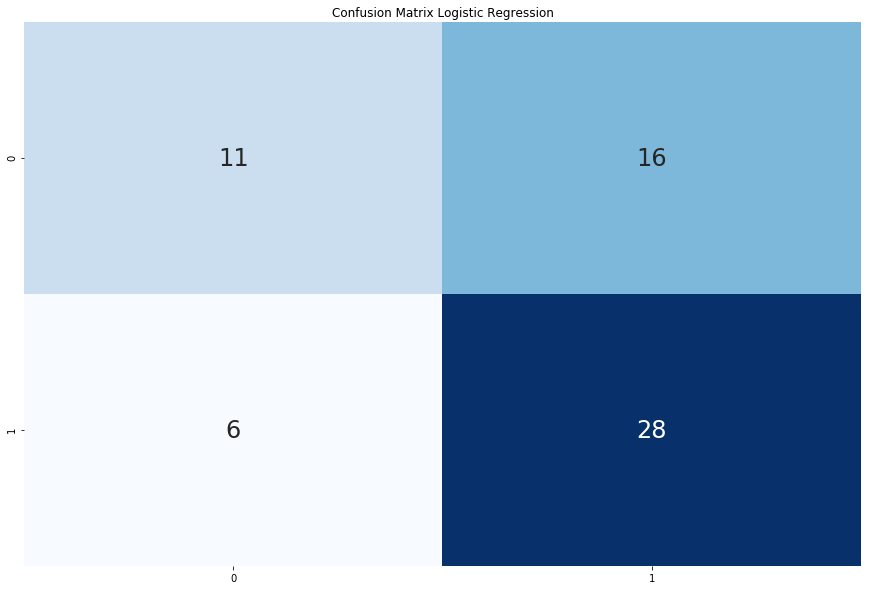

In [143]:
plot.figure(figsize=(15,10))

plot.title("Confusion Matrixes",fontsize=20)
plot.plot(wspace = 0.4, hspace= 0.4)

plot.subplot(1,1,1)
plot.title("Confusion Matrix Logistic Regression")
sns.heatmap(confusion_m_logistic_regression,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

The second confusion matrix is for K-Nearest Neighbour.The figure is shown below.

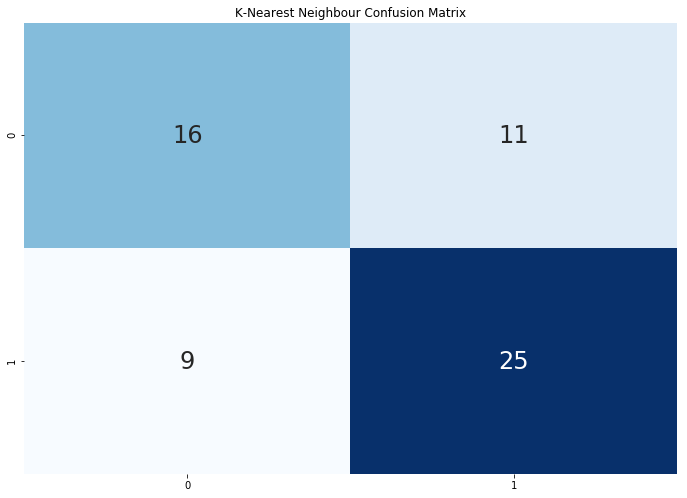

In [144]:
plot.subplot(1,1,1)
plot.title("K-Nearest Neighbour Confusion Matrix")
sns.heatmap(confusion_m_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

The Third confusion matrix is for Support Vector Machine.The figure is shown below.

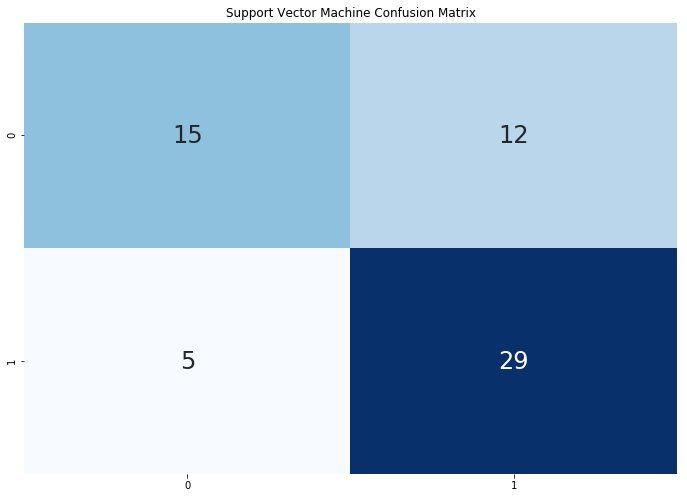

In [145]:
plot.subplot(1,1,1)
plot.title("Support Vector Machine Confusion Matrix")
sns.heatmap(confusion_m_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

The Fourth confusion matrix is for Random Forest.The figure is shown below.

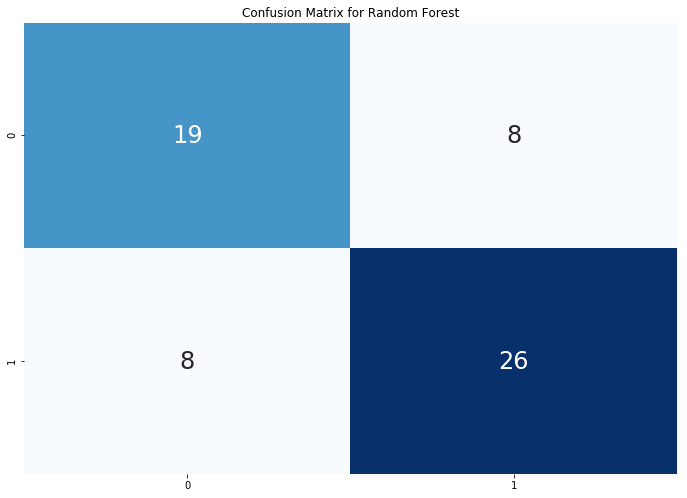

In [146]:
plot.subplot(1,1,1)
plot.title("Confusion Matrix for Random Forest")
sns.heatmap(confusion_m_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

After compare each model the KNN model is chosen for further analysis. The sole reason is the accuracy rate for each target value in KNN is pridicted correctly and the error rate is low for this particular model. The classification report will be generated for KNN in the below step.

In [147]:
##KNN Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.29      0.30      0.29        27
           1       0.42      0.41      0.42        34

    accuracy                           0.36        61
   macro avg       0.35      0.35      0.35        61
weighted avg       0.36      0.36      0.36        61



#Conclusion
The heart disease is one of the common issue in human being which leads to death. The algorithm used in this report will help in pridicting wheather a patient have a heart disease or not. It is seen that the high calastoral leads to high blood pressure which results in heart diseases. Also, Older people has less chances of getting a heart disease. Also, if the sugar level is high the chances of having a heart disease is high as well. It is also found that the female have more heart disease compare to male. Different chest pain type have different impact on the heart. Type 1 and Type 2 has more heart disease. The algorithm pridicted great accuracy for this particular dataset. In the future, more algorithm can be used to see the change in the accuracy level. Also, different factors such as thalasemia or depression can also be dig further down to see the trend. Further, adjustment of parameter can also be looked into for the future. In a nutshell, serval factors play into the cause of having a heart disease.

#Reference



1.   
https://www.kaggle.com/kralmachine/analyzing-the-heart-disease/data 


2.   https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning/notebook 


3.   https://www.kaggle.com/mgancita/what-causes-heart-disease 

4.   https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model/notebook


5.   https://www.ahajournals.org/doi/10.1161/CIR.0000000000000659







